$$ J = (\mathbf{z} - \mathbf{Hx})^\text{T} \mathbf{S_z}^{-1} (\mathbf{z}-\mathbf{Hx}) + (\mathbf{x}-\mathbf{x}_0)^\text{T} \mathbf{S_x}^{-1} (\mathbf{x}-\mathbf{x}_0) $$

In [1]:
from var4d_components import Var4D_Components
from visualize_results import Visualize_Obs, Visualize_Fluxes, Diagnostic_Plots

# First (example) inversion
* Only assimilate NOAA observatories Mauna Loa (MLO), Barrow (BRW), Samoa (SMO) and South Pole (SPO)
* Error in flux = 0.25 $\times$ absolute NEE on land, 0.5 $\times$ absolute ocean flux on ocean
* Temporal correlation of 2 months in prior flux error, no spatial (cross-region) correlation
* Print out and store intermediate cost functions and gradient norms

In [9]:
var4d = Var4D_Components('only_noaa_observatories', verbose=False, store_intermediate=True) # change verbose to True to see the progress of the optimizer
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'sites': ['mlo', 'spo', 'brw', 'smo']} # just the four observatories
prior_flux_unc_dict = {'prior_unc_source': 'nee', 'prior_unc_scale': {'land': 0.25, 'ocean': 0.5}}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, **prior_flux_unc_dict)

Converting CT2022 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

1245 of 1156383 obs will be assimilated


Converting SiB4 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

In [10]:
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Cost function evaluation: |          | 0 [00:00, ?it/s]

Gradient evaluation: |          | 0 [00:00, ?it/s]

Forward transport: |          | 0 [00:00, ?it/s]

Adjoint transport: |          | 0 [00:00, ?it/s]

Hessian product evaluation: |          | 0 [00:00, ?it/s]

End of 4DVAR loop


### Visualize the results

The intermediate cost functions and gradient norms as a function of iteration.

__Question: Why are there more cost function and gradient evaluations than there are iterations?__

__Question: What would happen if you had less or more observations to assimilate?__

__Question: Try a different minimizer (see full documentation [here](https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.optimize.minimize.html))__

__Question: How loose of a convergence criterion can your model tolerate and still get good results?__

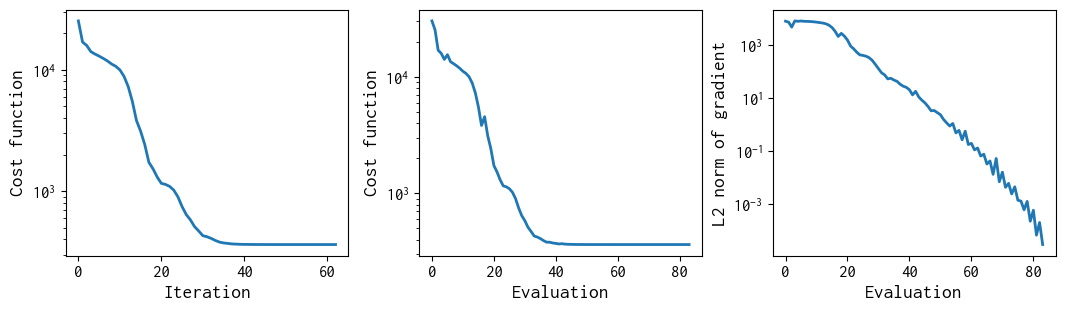

In [11]:
diag = Diagnostic_Plots('only_noaa_observatories')
diag.plot_convergence()

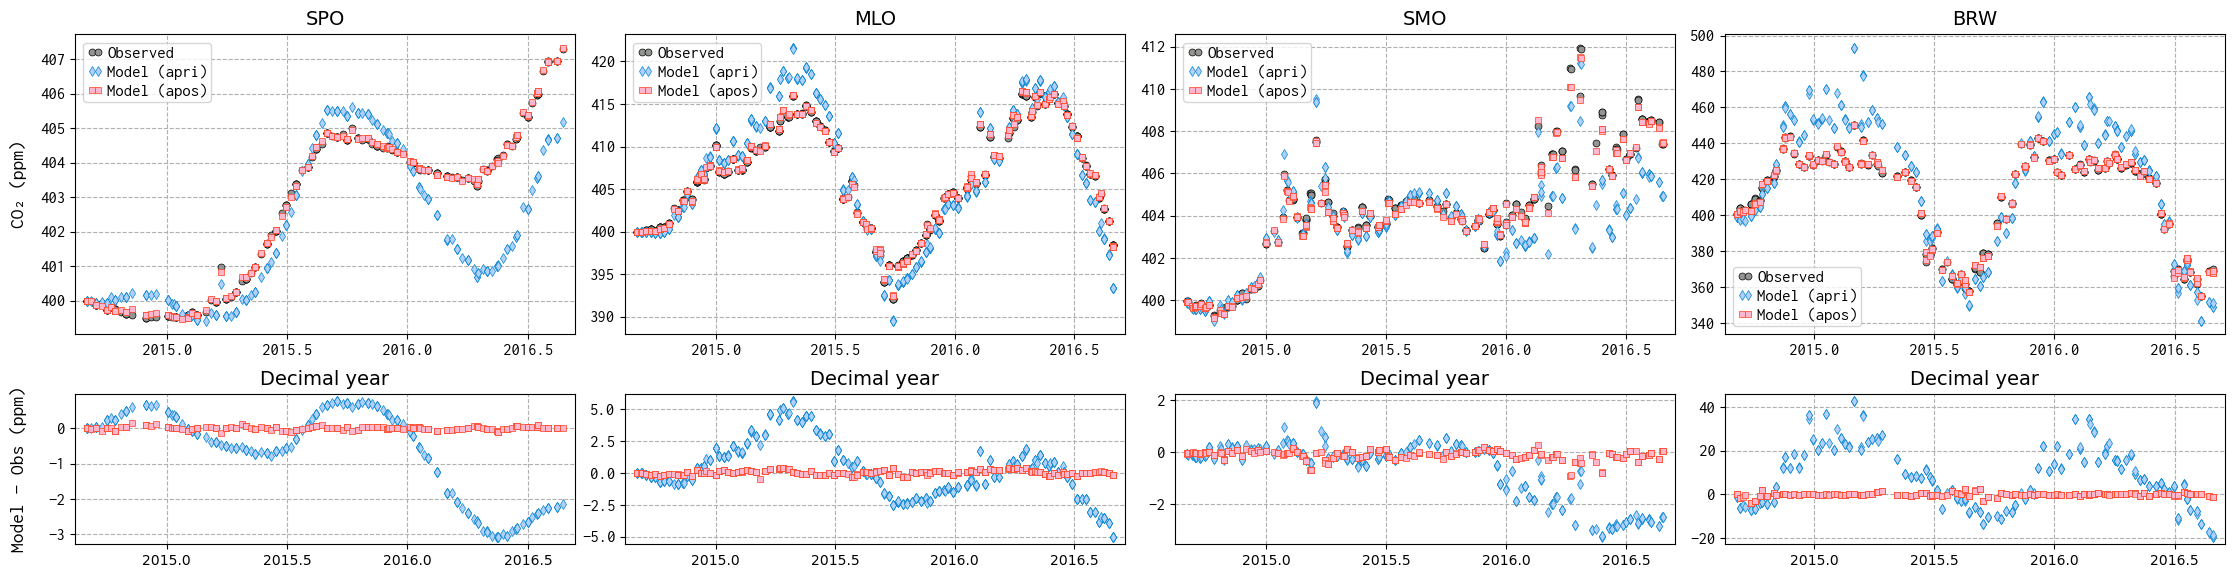

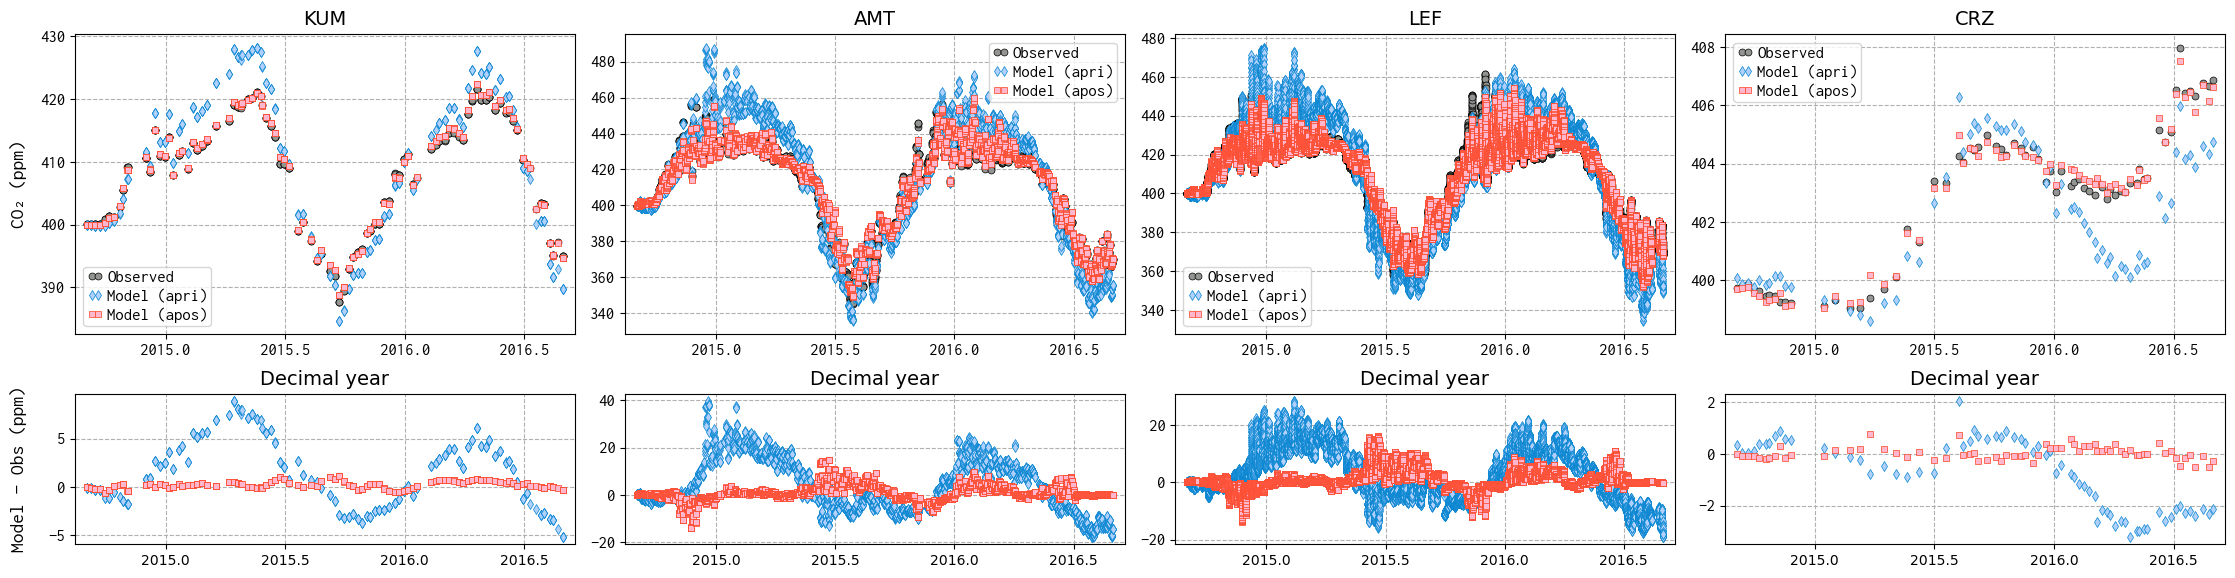

In [12]:
po1 = Visualize_Obs('only_noaa_observatories')
po1.plot_site(['spo','mlo','smo', 'brw'])
po1.plot_site(['kum','amt','lef','crz'])

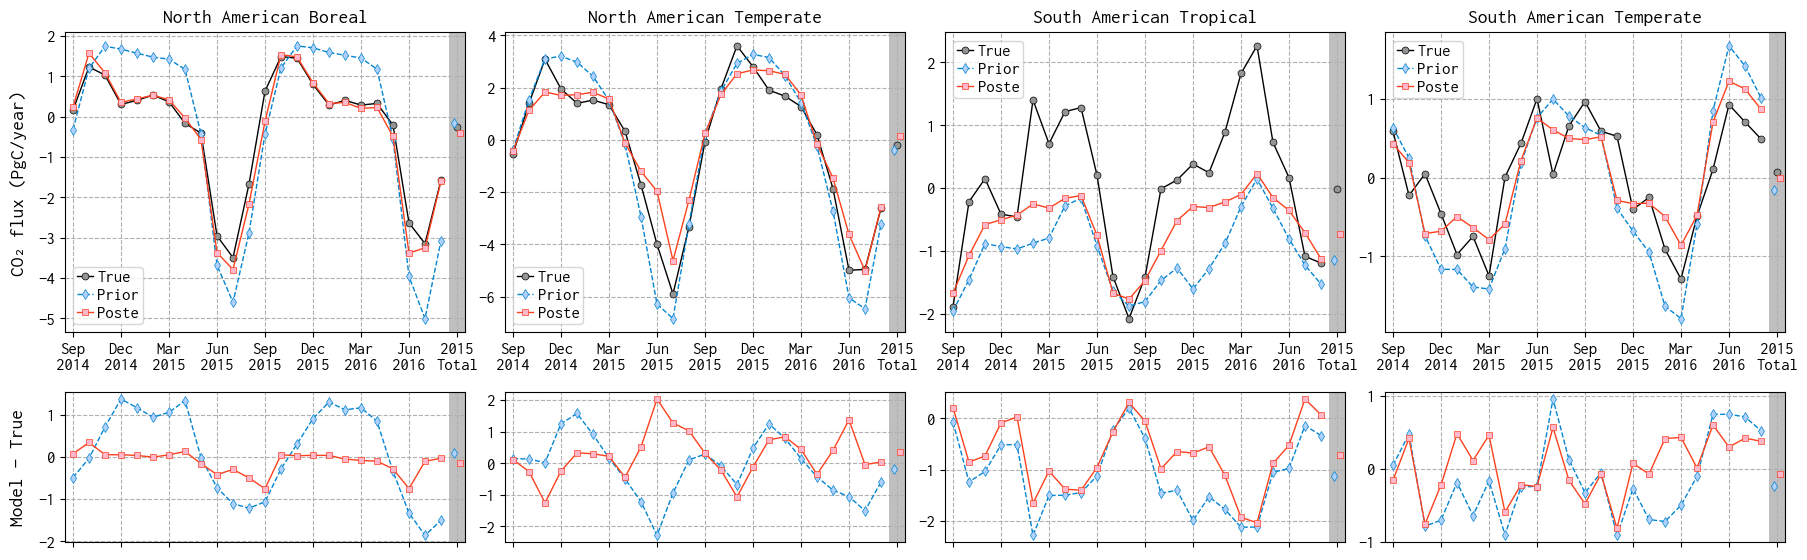

In [13]:
vf1 = Visualize_Fluxes('only_noaa_observatories')
vf1.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

## Change the error setting to key off ecosystem respiration instead of NEE

* Error in flux = 0.5 $\times$ absolute flux for oceans, 0.25 $\times$ ecosystem respiration for land

In [14]:
var4d = Var4D_Components('only_noaa_observatories_reco', verbose=False, store_intermediate=True) # change verbose to True to see the progress of the optimizer
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'sites': ['mlo', 'spo', 'brw', 'smo']} # just the four observatories
prior_flux_unc_dict = {'prior_unc_source': 'reco', 'prior_unc_scale': {'land': 0.25, 'ocean': 0.5}}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, **prior_flux_unc_dict)

Converting CT2022 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

1245 of 1156383 obs will be assimilated


Converting SiB4 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

Converting SiB4 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

In [15]:
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Cost function evaluation: |          | 0 [00:00, ?it/s]

Gradient evaluation: |          | 0 [00:00, ?it/s]

Forward transport: |          | 0 [00:00, ?it/s]

Adjoint transport: |          | 0 [00:00, ?it/s]

Hessian product evaluation: |          | 0 [00:00, ?it/s]

End of 4DVAR loop


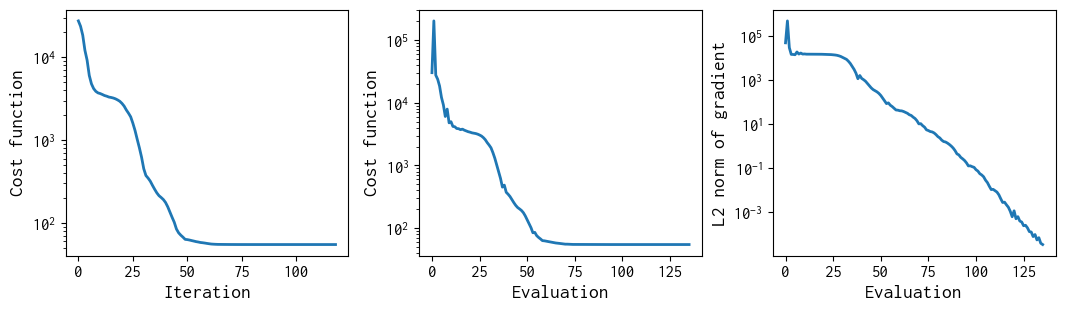

In [17]:
diag = Diagnostic_Plots('only_noaa_observatories_reco')
diag.plot_convergence()

##### Note that this took longer to converge

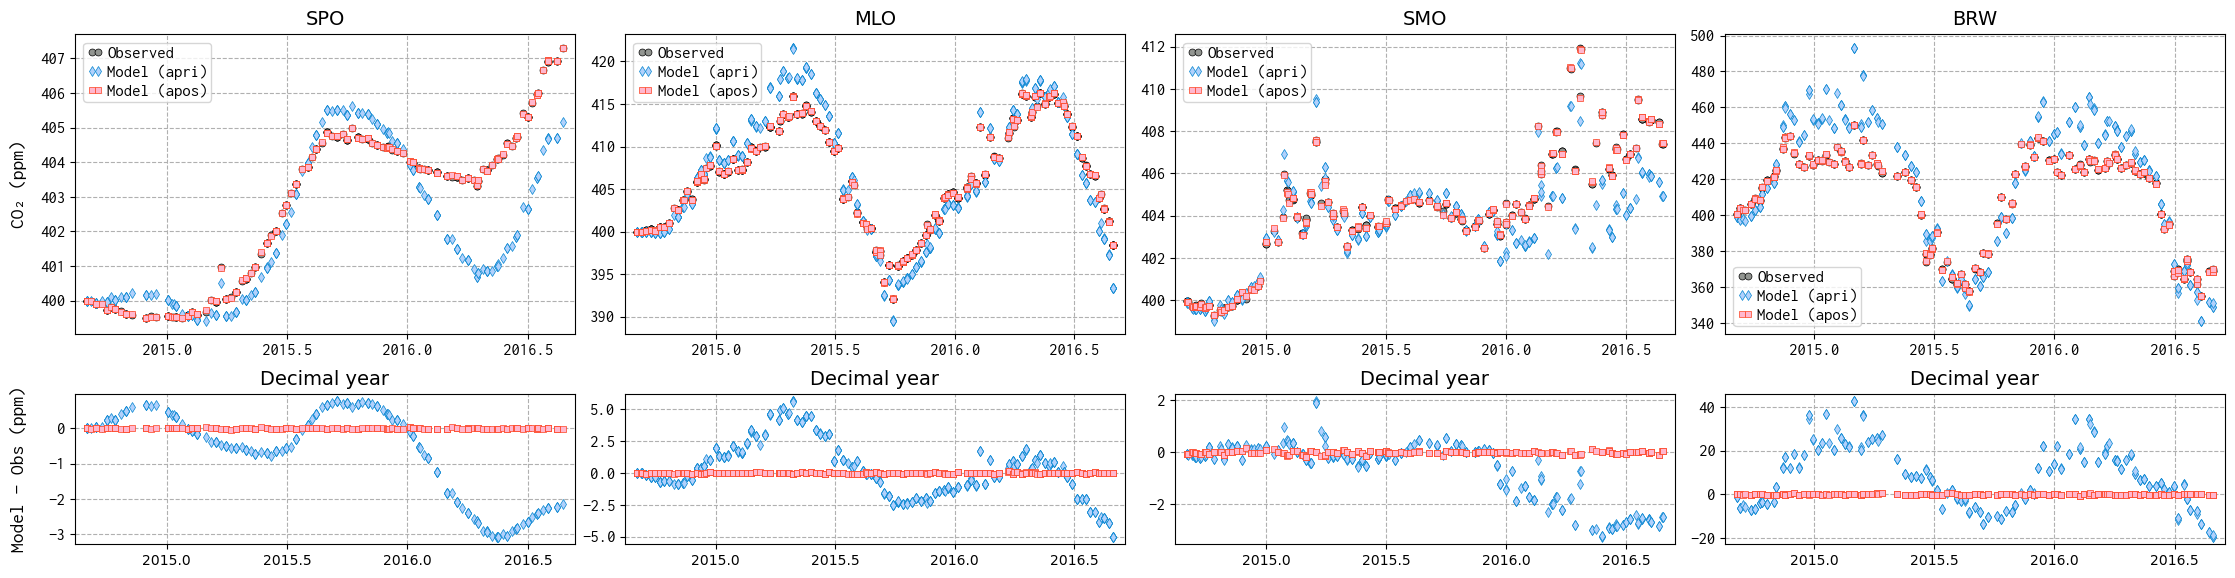

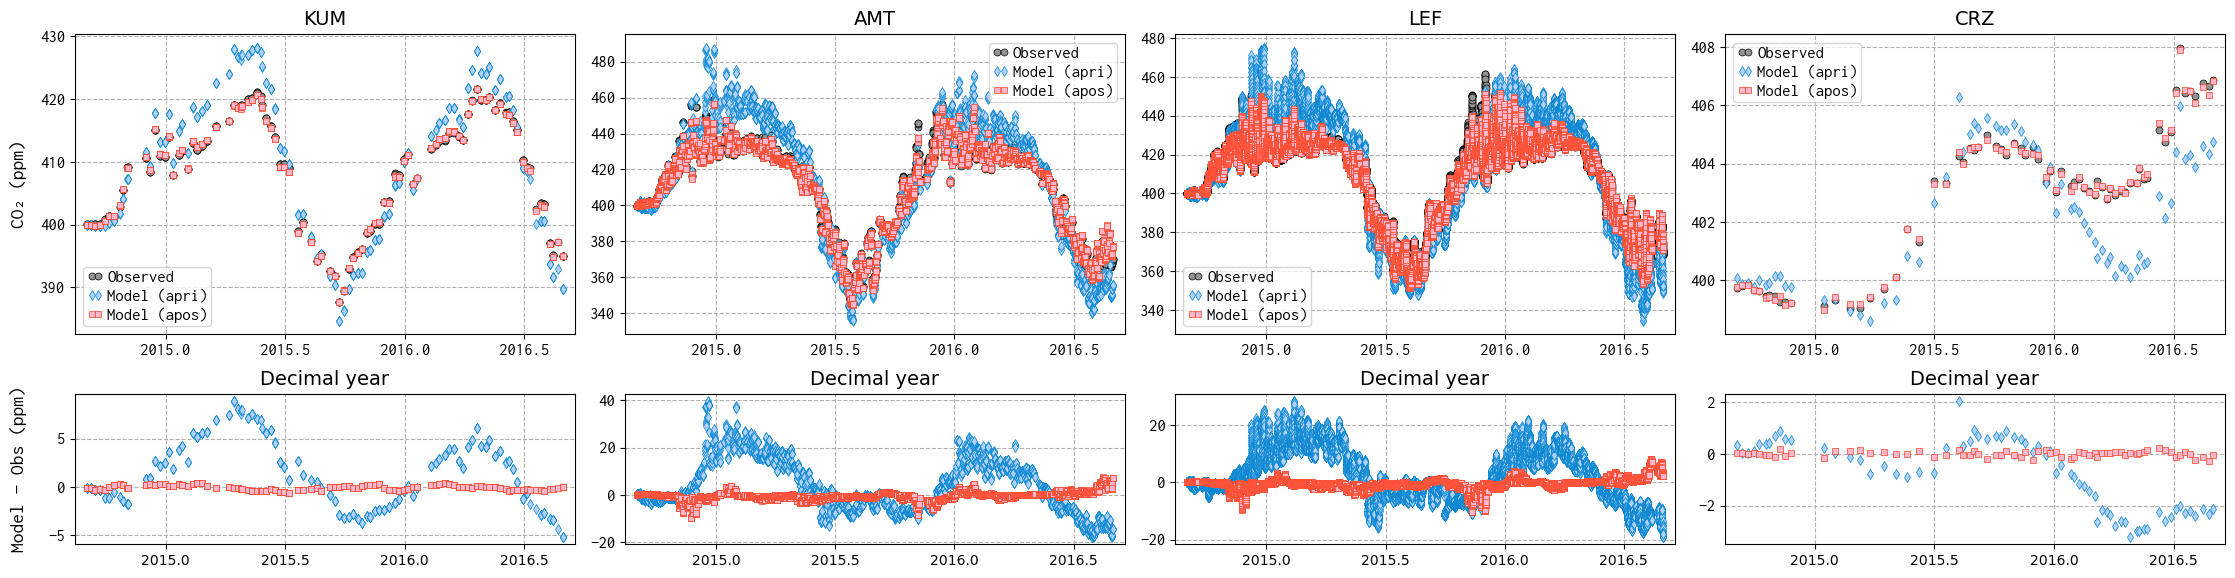

In [18]:
po1 = Visualize_Obs('only_noaa_observatories_reco')
po1.plot_site(['spo','mlo','smo', 'brw'])
po1.plot_site(['kum','amt','lef','crz'])

##### But the simulation of non-assimilated obs is better!

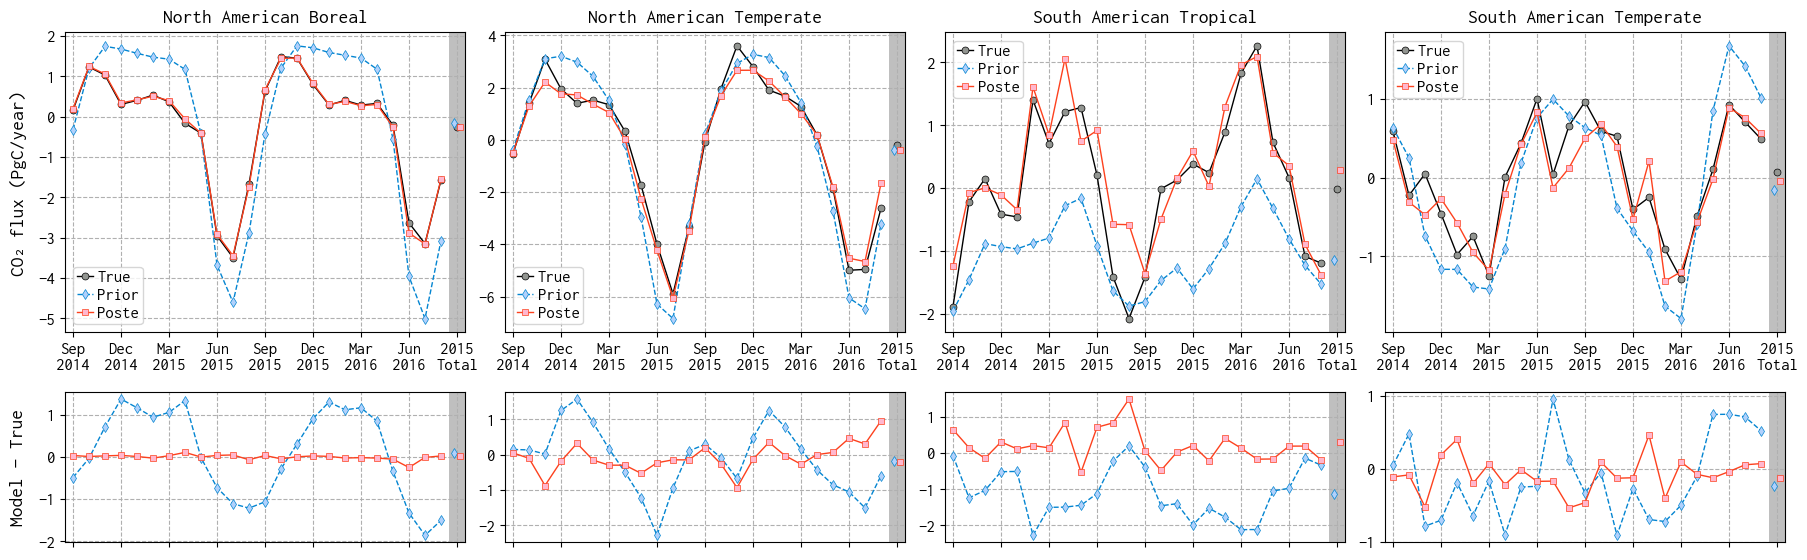

In [19]:
vf1 = Visualize_Fluxes('only_noaa_observatories_reco')
vf1.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

##### Recovery of true fluxes over the Tropics is also better (Why?)

# Second (example) inversion
* Assimilat all in situ observations that were assimilated in the OCO2 MIP
* Error in flux = 0.25 $\times$ absolute flux
* Temporal correlation of 2 months in prior flux error, no spatial (cross-region) correlation
* Print out and store intermediate cost functions and gradient norms

In [6]:
obs_to_assim = {'is': True}
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
var4d = Var4D_Components('all_insitu', verbose=True, store_intermediate=True)
var4d.var4d_setup(obs_to_assim=obs_to_assim, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Converting CT2022 to state vector: 100%|██████████| 24/24 [00:00<00:00, 42.57it/s]


    Read Jacobian in  17.51s
    Simulated transport in  0.46s
462509 of 1156383 obs will be assimilated
  Created true obs in  18.68s


Converting SiB4 to state vector: 100%|██████████| 24/24 [00:01<00:00, 13.55it/s]


  Prior fluxes and covariance setup in  1.91s
  Simulated transport in  0.48s
      Simulated transport in  0.46s
    [1] Cost calculated in  0.57s (J = 4.826e+06)
    [1] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 1.018e+06)
      Simulated transport in  0.46s
    [2] Cost calculated in  0.57s (J = 3.918e+06)
    [2] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 8.503e+05)
      Simulated transport in  0.46s
    [3] Cost calculated in  0.59s (J = 2.962e+06)
    [3] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 1.433e+06)
      Simulated transport in  0.46s
    [4] Cost calculated in  0.58s (J = 1.974e+06)
    [4] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 1.318e+06)
      Simulated transport in  0.47s
    [5] Cost calculated in  0.58s (J = 4.462e+06)
    [5] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 1.52e+06)
      Simulated transport in  0.46s
    [6] Cost calculated in  0.59s (J = 1.752e+06)
    [6] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 1.312e+06)
      Simulated transport in  0.46s
    [7] Cos

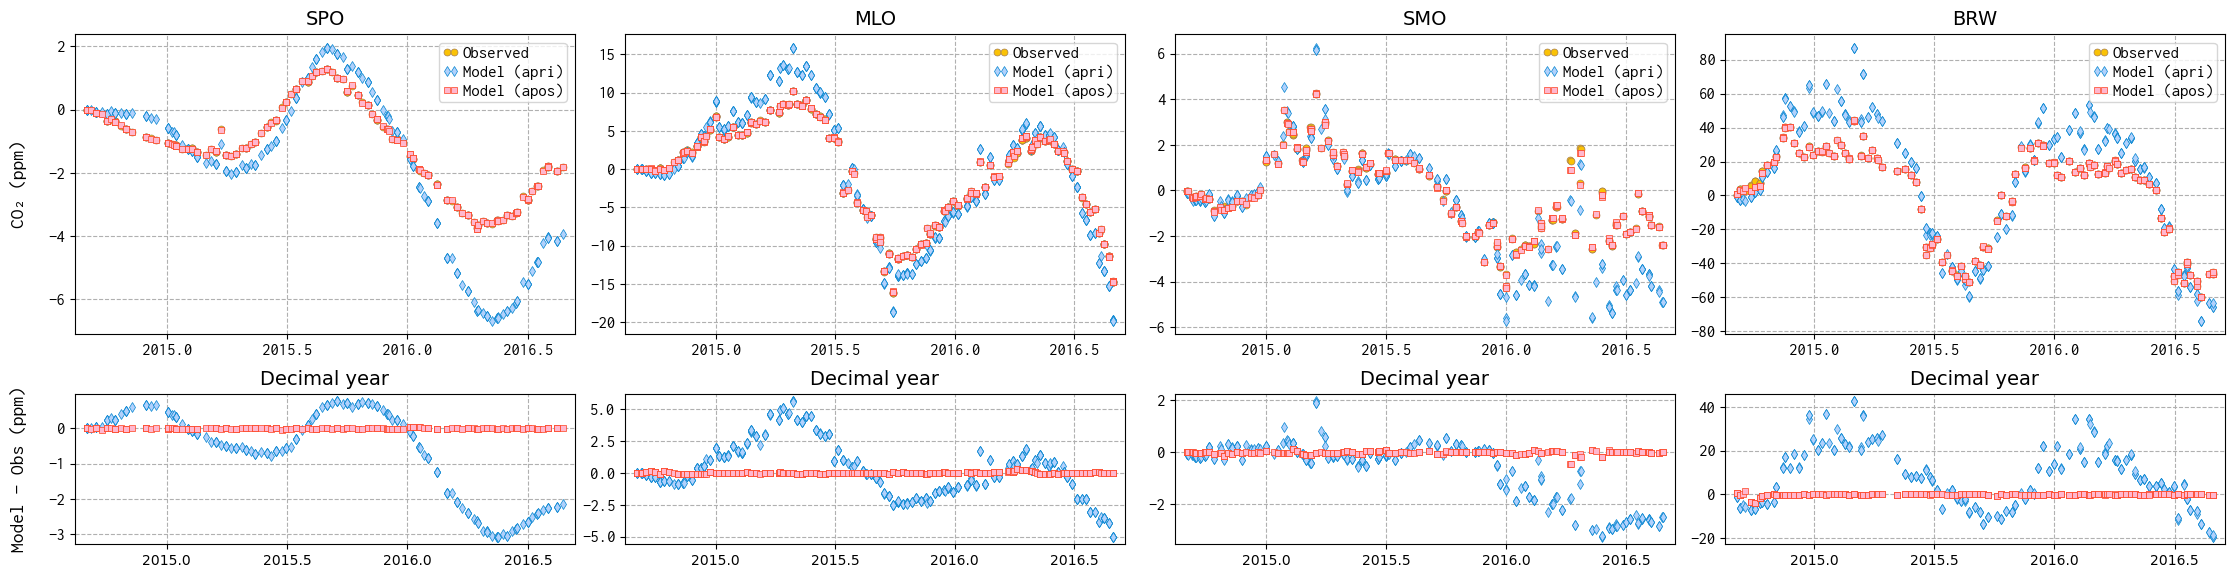

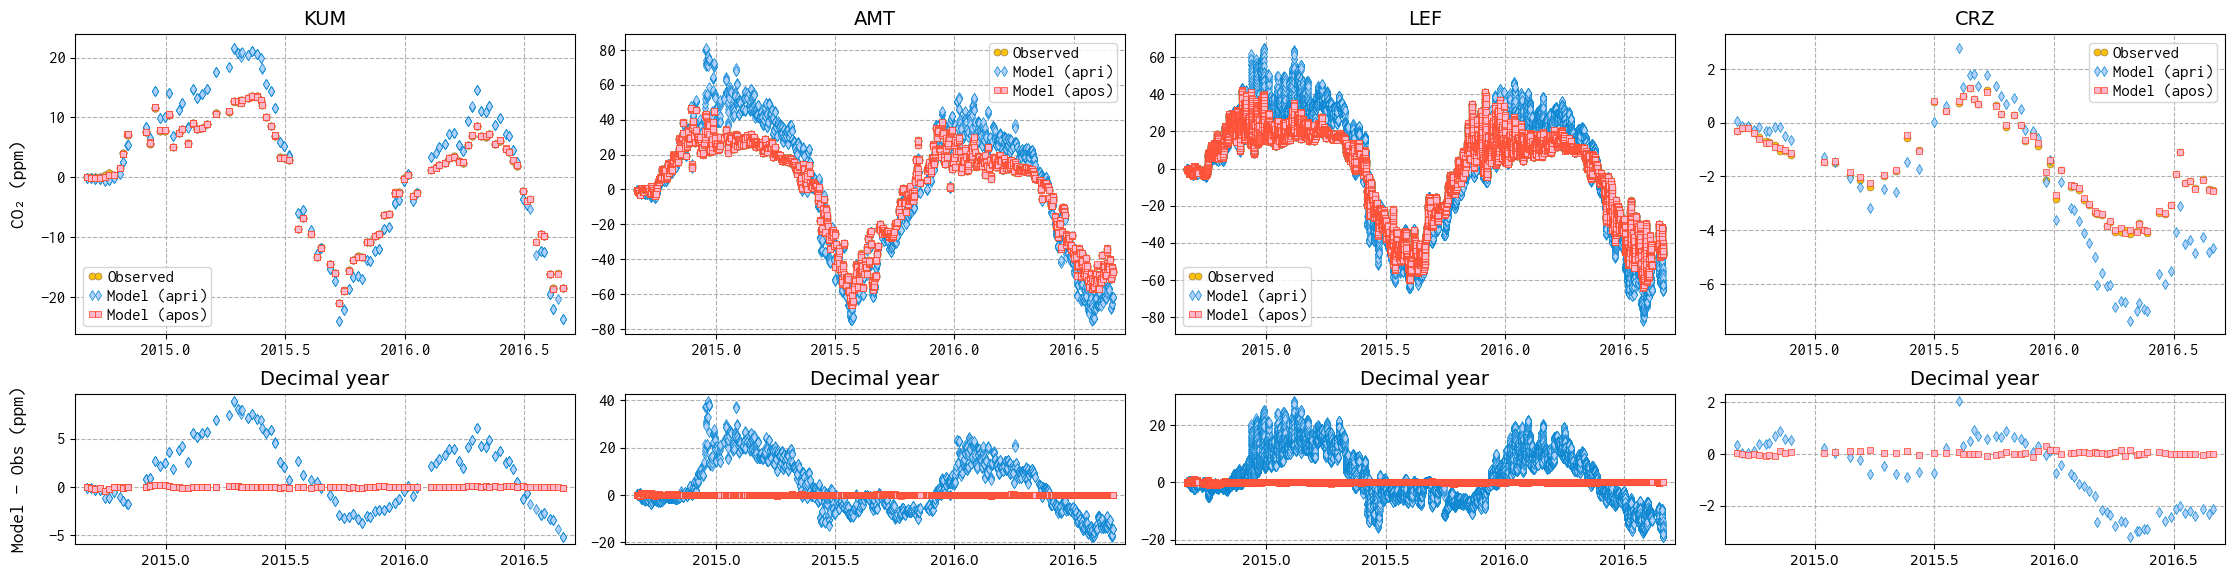

In [7]:
po2 = Visualize_Obs('all_insitu')
po2.plot_site(['spo','mlo','smo', 'brw'])
po2.plot_site(['kum','amt','lef','crz'])

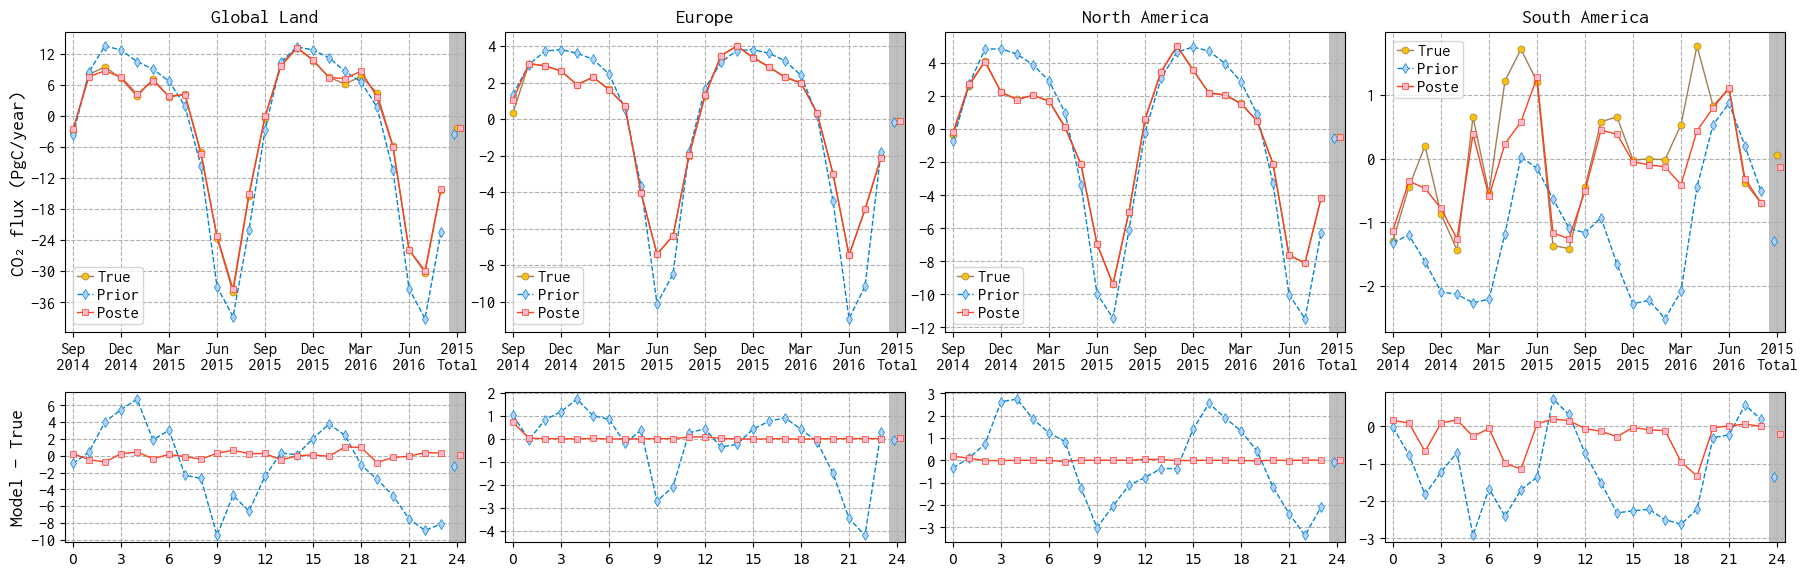

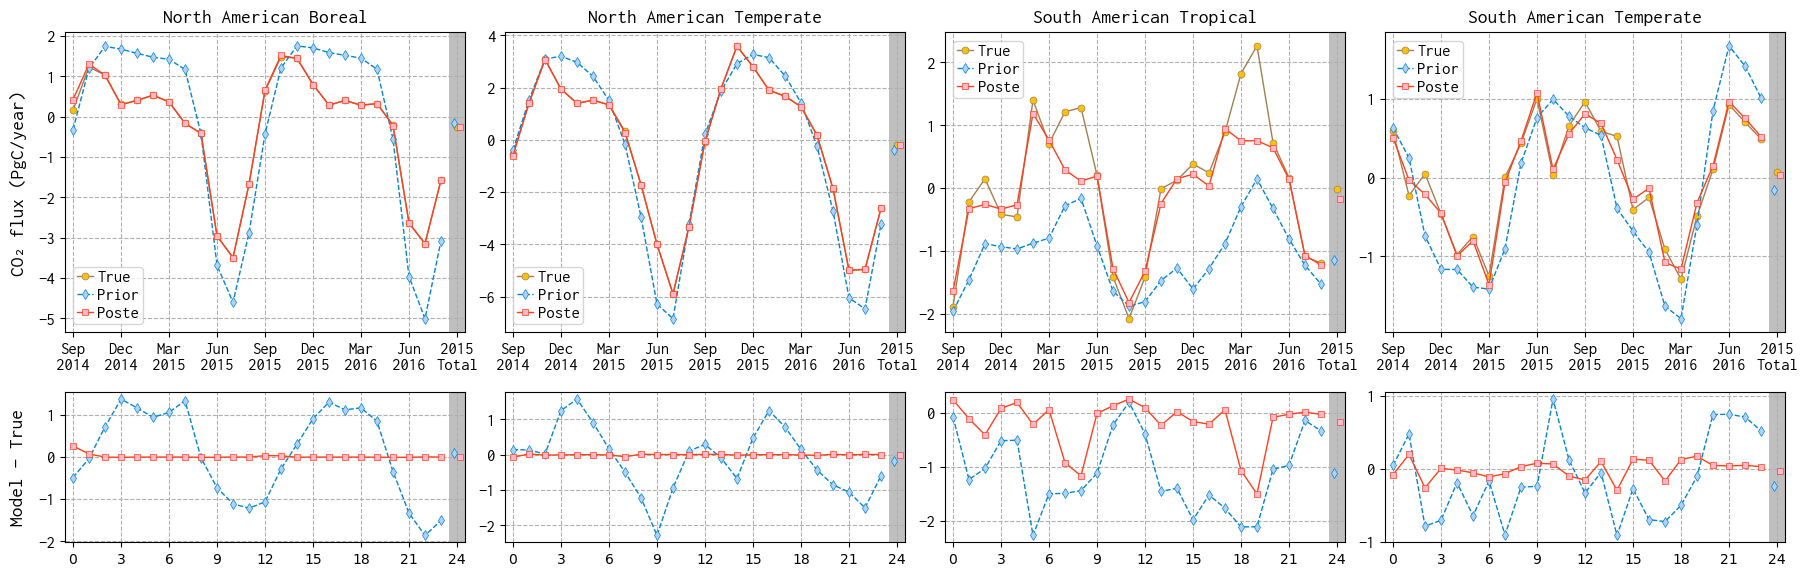

In [8]:
vf2 = Visualize_Fluxes('all_insitu')
vf2.plot_region(['Global Land', 'Europe', 'North America', 'South America'])
vf2.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])